<a href="https://colab.research.google.com/github/PietroDF/Covid_forecast/blob/master/Covid_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

## Libraries

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import scipy.optimize, scipy.stats

In [0]:
import datetime as dt

## Dataset

In [0]:
# Change path to make it fully working
path_to_txt = '/content/drive/My Drive/Machine Learning/COVID/dpc-covid19-ita-andamento-nazionale.csv'

In [0]:
csv_data = pd.read_csv(path_to_txt)

In [8]:
csv_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
18,2020-03-13 17:00:00,ITA,7426,1328,8754,6201,14955,2116,1439,1266,17660,97488
19,2020-03-14 17:00:00,ITA,8372,1518,9890,7860,17750,2795,1966,1441,21157,109170
20,2020-03-15 17:00:00,ITA,9663,1672,11335,9268,20603,2853,2335,1809,24747,124899
21,2020-03-16 17:00:00,ITA,11025,1851,12876,10197,23073,2470,2749,2158,27980,137962
22,2020-03-17 17:00:00,ITA,12894,2060,14954,11108,26062,2989,2941,2503,31506,148657


# Data exploration

In [0]:
day_month = [x[0:10] for x in csv_data['data'].tolist()]
new_pos = [x for x in csv_data['nuovi_attualmente_positivi'].tolist()]
tot_pos = [x for x in csv_data['totale_attualmente_positivi'].tolist()]

In [10]:
tot_pos

[221,
 311,
 385,
 588,
 821,
 1049,
 1577,
 1835,
 2263,
 2706,
 3296,
 3916,
 5061,
 6387,
 7985,
 8514,
 10590,
 12839,
 14955,
 17750,
 20603,
 23073,
 26062]

## Cumulative positive cases

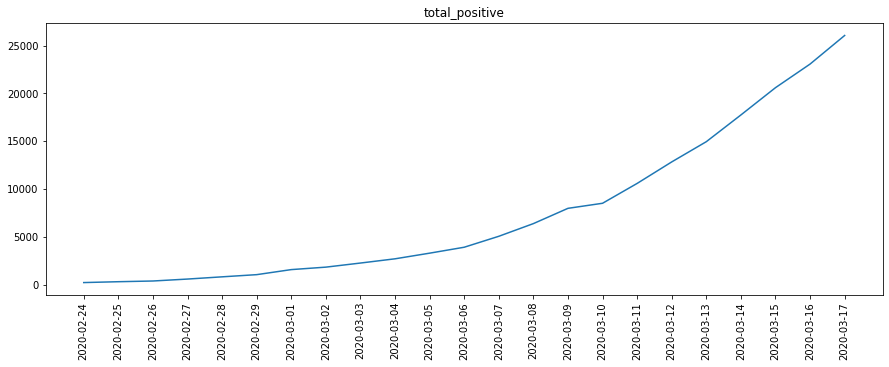

In [162]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('total_positive')
plt.plot(day_month,tot_pos)

plt.show()

## Daily postive cases

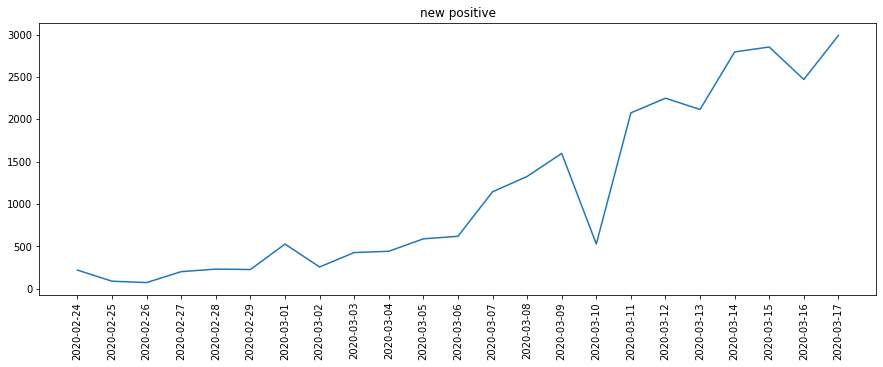

In [161]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('new positive')
plt.plot(day_month,new_pos)

plt.show()
# Looks like we have outlier on the 10th of March! Not going to correct it..

## Create Gaussian curve

In [0]:
# Create normal distribution curve
normal_dib = scipy.stats.norm(0, 1)

In [14]:
# Try some random values
normal_dib.pdf([0,0.1])

array([0.39894228, 0.39695255])

In [0]:
# Create x vector
x = np.linspace(-3.5, 3.5,71)

In [16]:
x

array([-3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8, -2.7, -2.6, -2.5,
       -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4,
       -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3,
       -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,
        0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,
        2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,
        3.1,  3.2,  3.3,  3.4,  3.5])

In [0]:
# Calculate y values according to normal pdf
y = normal_dib.pdf(x)

In [151]:
y

array([0.00087268, 0.00123222, 0.00172257, 0.00238409, 0.00326682,
       0.00443185, 0.00595253, 0.00791545, 0.01042093, 0.01358297,
       0.0175283 , 0.02239453, 0.02832704, 0.03547459, 0.0439836 ,
       0.05399097, 0.06561581, 0.07895016, 0.09404908, 0.11092083,
       0.1295176 , 0.14972747, 0.17136859, 0.19418605, 0.21785218,
       0.24197072, 0.26608525, 0.28969155, 0.31225393, 0.3332246 ,
       0.35206533, 0.36827014, 0.38138782, 0.39104269, 0.39695255,
       0.39894228, 0.39695255, 0.39104269, 0.38138782, 0.36827014,
       0.35206533, 0.3332246 , 0.31225393, 0.28969155, 0.26608525,
       0.24197072, 0.21785218, 0.19418605, 0.17136859, 0.14972747,
       0.1295176 , 0.11092083, 0.09404908, 0.07895016, 0.06561581,
       0.05399097, 0.0439836 , 0.03547459, 0.02832704, 0.02239453,
       0.0175283 , 0.01358297, 0.01042093, 0.00791545, 0.00595253,
       0.00443185, 0.00326682, 0.00238409, 0.00172257, 0.00123222,
       0.00087268])

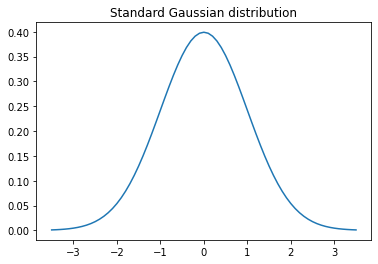

In [160]:
# plot value

plt.title('Standard Gaussian distribution')
plt.plot(x,y)
plt.show()

## Plot scaled gaussian curve

In [0]:
# Extract first "n" values, the ones we can optimize our curve on
past_x = x[:len(tot_pos)]
past_y = y[:len(tot_pos)]

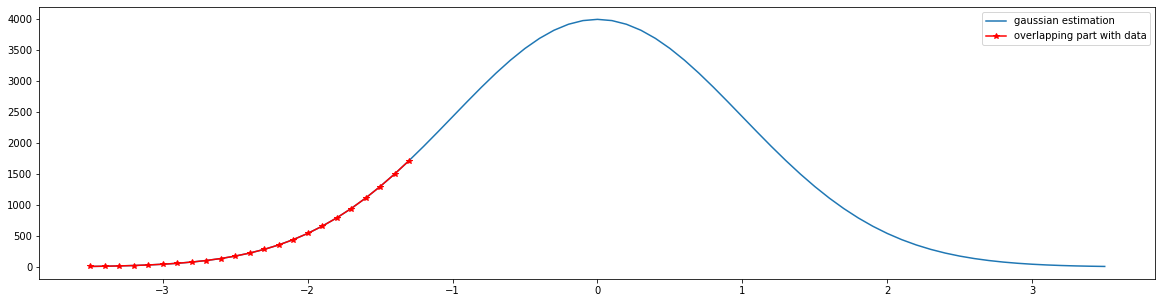

In [156]:
# Plot values in scale factor
scale_factor = 10000 # guess value

plt.figure(figsize=(20,5))

plt.plot(x, y*scale_factor, label="gaussian estimation")
plt.plot(past_x,past_y*scale_factor,'-*r', label="overlapping part with data")

plt.legend()
plt.show()

## Plot gaussian curve vs actual daily cases

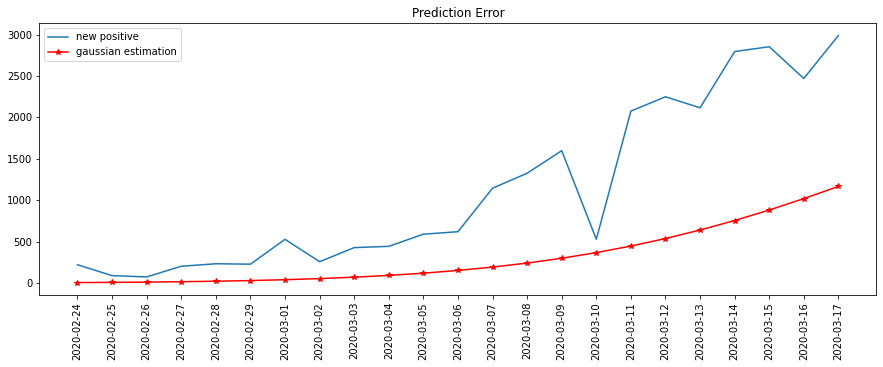

In [148]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('Prediction Error')
plt.plot(day_month, new_pos, label="new positive")
plt.plot(past_y*scale_factor,'-*r', label="gaussian estimation")

plt.legend()
plt.show()

# Optimizer

In [0]:
# Define function to calculate error
def compute_cost(val_in):

  # Extract parameters
  mu = val_in[0]
  sigma = abs(val_in[1])
  scale_factor = val_in[2]*1000

  normal_dib = scipy.stats.norm(mu, sigma)

  # Build Gaussian curve
  y = normal_dib.pdf(x)*scale_factor

  # Take only first "n" comparison elements
  past_x = x[:len(tot_pos)]
  past_y = y[:len(tot_pos)]

  # Compute errors
  error = new_pos - past_y

  # Define which norm to use
  error = np.linalg.norm(error,2)

  return error

# Initial guess
mu0 = 0
sigma0 = 1
scale_factor0 = 1

guess_vector = [mu0, sigma0, scale_factor0]

# Call minimizer
best_param = scipy.optimize.minimize(compute_cost, guess_vector)

In [102]:
best_param

      fun: 1345.4297363040937
 hess_inv: array([[0.0026787 , 0.00132669, 0.01931691],
       [0.00132669, 0.00069075, 0.00963645],
       [0.01931691, 0.00963645, 0.14067829]])
      jac: array([-0.00042725,  0.00119019,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 452
      nit: 28
     njev: 88
   status: 2
  success: False
        x: array([-0.98550182,  0.85458874,  6.8086901 ])

In [0]:
# Get optimized parameters
mu = best_param.x[0]
sig = abs(best_param.x[1])
scale_factor = best_param.x[2]*1000

# Compute prediction
forecast = scipy.stats.norm(mu, sig).pdf(x)*scale_factor

In [0]:
# Build complete list of dates
first_day = dt.datetime(2020,2,24)
day_list = [first_day + dt.timedelta(days=x) for x in range(len(forecast))]
day_list = [x.strftime("%Y-%m-%d") for x in day_list]

## Plot predictions

### Error bar chart

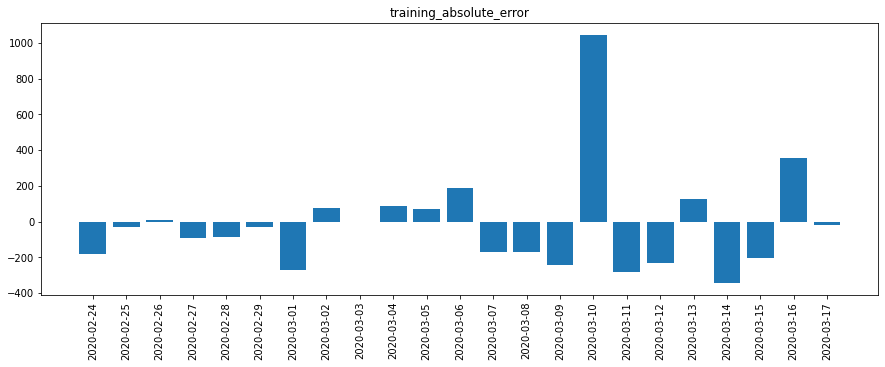

In [143]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('Training absolute error')

plt.bar(day_month, (forecast[:len(new_pos)]-new_pos))

plt.show()

### New daily case vs Forecast


Number of total positive cases: 67995



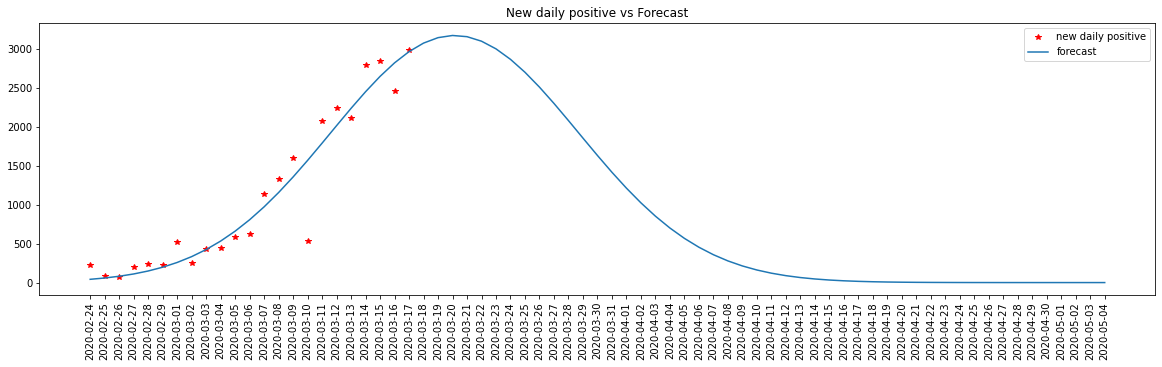

In [145]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.title('New daily positive vs Forecast')

plt.plot(day_month, new_pos,'*r', label="new daily positive")
plt.plot(day_list, forecast, label="forecast")

tot_contagi = int(np.sum(forecast))
print('\nNumber of total positive cases: '+str(tot_contagi)+'\n')

plt.legend()
plt.show()

### Cumulative distribution function: Actual vs Forecast

In [0]:
# Calculate Cumulative Distribution Function
cum_positive = np.cumsum(forecast)

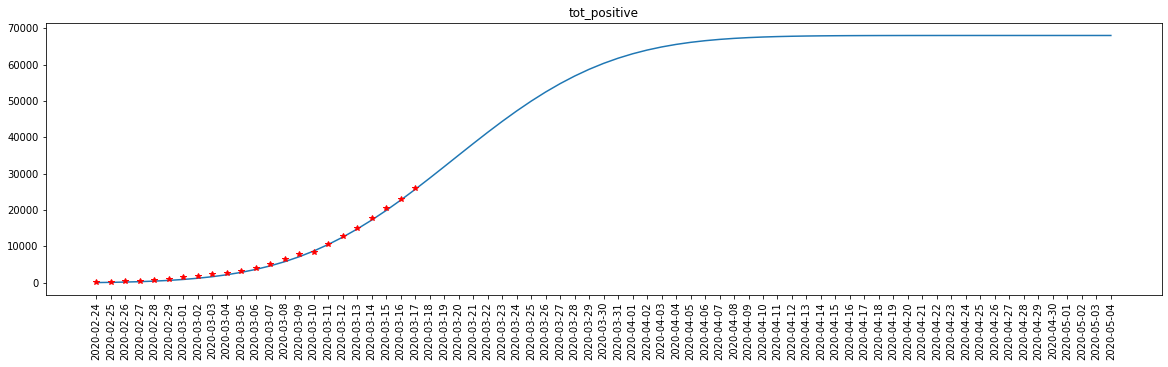

In [127]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.title('tot_positive')

plt.plot(day_list, cum_positive)
plt.plot(day_month,tot_pos,'*r')

# Monte-Carlo simulation
In this section we run multiple times the same simulation changing each time the initial guess vector according to random values

In [0]:
# Define new variables
num_elapsed_days = len(new_pos)
tomorrow_new_positives = 0
tomorrow_cum_positives = 0

In [0]:
num_simulations = 5

# Initialize vectors
mu = np.zeros((num_simulations,1))
sigma = np.zeros((num_simulations,1))
k = np.zeros((num_simulations,1))

forecast = []
cum_contagi = []

# Compute simulations
for i in range(num_simulations):
  
  mu0 = 0
  sigma0 = 1
  k0 = 1

  # Change initial values randomly
  mu0 = mu0*(0.5 + np.random.rand())
  sigma0 = sigma0*(0.5 + np.random.rand())
  k0 = k0*(0.5 + np.random.rand())  

  # Run optimizer
  best_param = scipy.optimize.minimize(compute_cost, [mu0,sigma0,k0])

  # Get parameters
  [mu[i],sigma[i],k[i]] = best_param.x

  # Correct sigma in case it's negative
  sigma[i] = abs(sigma[i])

  # Calculate curve
  y = scipy.stats.norm(mu[i], sigma[i]).pdf(x)*k[i]*1000
  cumsum_y = np.cumsum(y)

  tomorrow_new_positives+=y[num_elapsed_days+1]
  tomorrow_cum_positives+=cumsum_y[num_elapsed_days+1]

  forecast.append(y)
  cum_contagi.append(cumsum_y)

tomorrow_new_positives = int(tomorrow_new_positives/num_simulations)
tomorrow_cum_positives = int(tomorrow_cum_positives/num_simulations)

## Plot Monte-Carlo predictions
If you see only one line it means that every forecast converged to the same solution

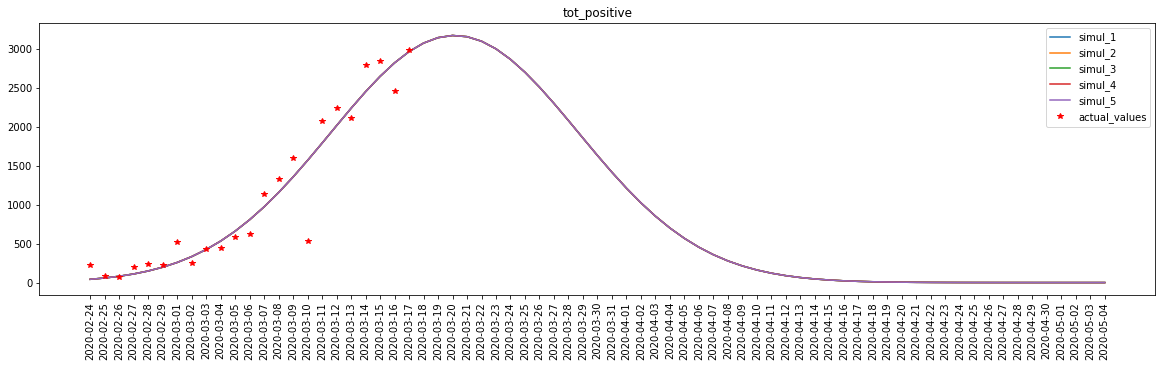

In [137]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.title('tot_positive')


for i in range(num_iter):

  plt.plot(day_list, forecast[i], label="simul_"+str(i+1))

plt.plot(new_pos,'*r', label="actual_values")

plt.legend()
plt.show()

## Plot cumulative distribution function

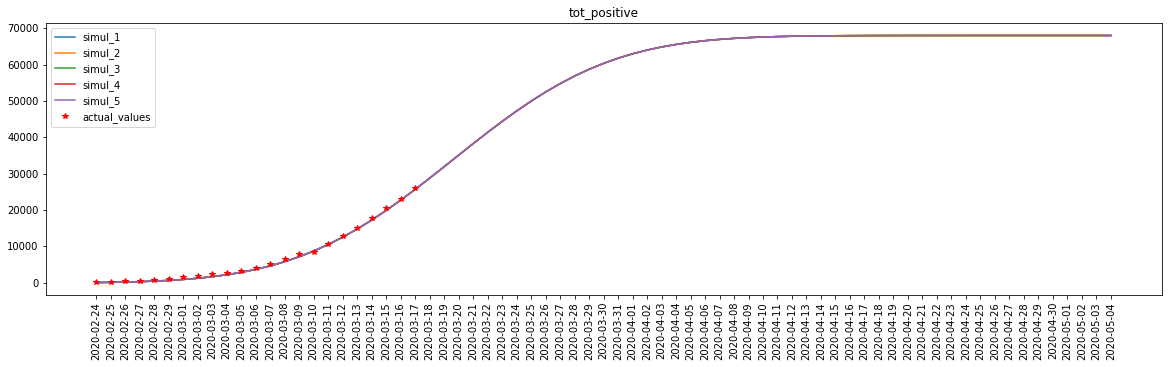

In [138]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.title('tot_positive')

for i in range(num_iter):

  plt.plot(day_list, cum_contagi[i], label="simul_"+str(i+1))

plt.plot(tot_pos,'*r', label="actual_values")

plt.legend()
plt.show()

## Prediction for tomorrow's cases

In [159]:
# Forecast per domani
print('Tomorrows new predicted cases: \t' + str(tomorrow_new_positives))
print('Tomorrows cumulative predicted value: \t' + str(tomorrow_cum_positives))

Tomorrows new predicted cases: 	3150
Tomorrows cumulative predicted value: 	31903
